In [1]:
import inspect

import matplotlib.pyplot as plt
import numpy as np

In [2]:
from L96_model import L96_2t_xdot_ydot

print(inspect.getsource(L96_2t_xdot_ydot))

@jit
def L96_2t_xdot_ydot(X, Y, F, h, b, c):
    """
    Calculate the time rate of change for the X and Y variables for the Lorenz '96, two time-scale
    model, equations 2 and 3:
        d/dt X[k] =     -X[k-1] ( X[k-2] - X[k+1] )   - X[k] + F - h.c/b sum_j Y[j,k]
        d/dt Y[j] = -b c Y[j+1] ( Y[j+2] - Y[j-1] ) - c Y[j]     + h.c/b X[k]

    Args:
        X : Values of X variables at the current time step
        Y : Values of Y variables at the current time step
        F : Forcing term
        h : coupling coefficient
        b : ratio of amplitudes
        c : time-scale ratio
    Returns:
        dXdt, dYdt, C : Arrays of X and Y time tendencies, and the coupling term -hc/b*sum(Y,j)
    """

    JK, K = len(Y), len(X)
    J = JK // K
    assert JK == J * K, "X and Y have incompatible shapes"
    Xdot = np.zeros(K)
    hcb = (h * c) / b

    Ysummed = Y.reshape((K, J)).sum(axis=-1)

    Xdot = np.roll(X, 1) * (np.roll(X, -1) - np.roll(X, 2)) - X + F - hcb * Ysummed
    #     

In [3]:
from L96_model import integrate_L96_2t

print(inspect.getsource(integrate_L96_2t))

def integrate_L96_2t(X0, Y0, si, nt, F, h, b, c, t0=0, dt=0.001):
    """
    Integrates forward-in-time the two time-scale Lorenz 1996 model, using the RK4 integration method.
    Returns the full history with nt+1 values starting with initial conditions, X[:,0]=X0 and Y[:,0]=Y0,
    and ending with the final state, X[:,nt+1] and Y[:,nt+1] at time t0+nt*si.

    Note the model is intergrated

    Args:
        X0 : Values of X variables at the current time
        Y0 : Values of Y variables at the current time
        si : Sampling time interval
        nt : Number of sample segments (results in nt+1 samples incl. initial state)
        F  : Forcing term
        h  : coupling coefficient
        b  : ratio of amplitudes
        c  : time-scale ratio
        t0 : Initial time (defaults to 0)
        dt : The actual time step. If dt<si, then si is used. Otherwise si/dt must be a whole number. Default 0.001.

    Returns:
        X[:,:], Y[:,:], time[:] : the full history X[n,k] and Y[n,

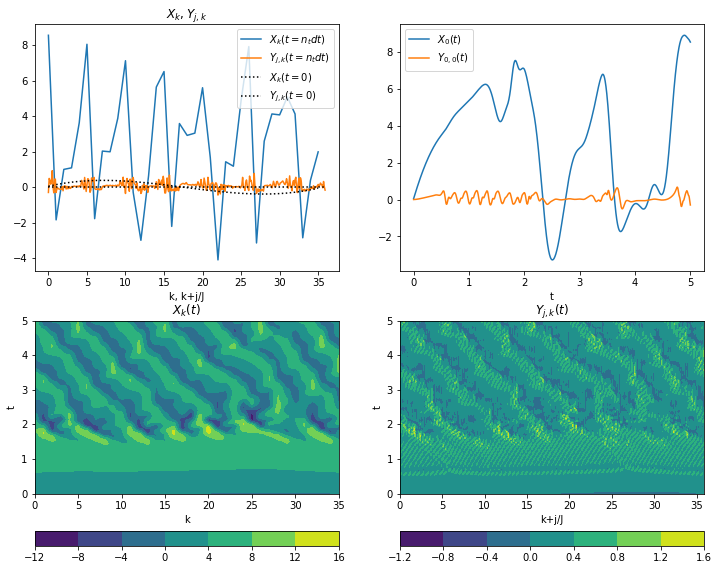

In [4]:
J = 10  # Number of local-scale Y variables per single global-scale X variable
K = 36  # Number of globa-scale variables X
nt = 1000  # Number of time steps
si = 0.005  # Sampling time interval
dt = 0.005  # Time step
F = 10.0  # Focring
h = 1.0  # Coupling coefficient
b = 10.0  # ratio of amplitudes
c = 10.0  # time-scale ratio


def s(k, K):
    """A non-dimension coordinate from -1..+1 corresponding to k=0..K"""
    return 2 * (0.5 + k) / K - 1


k = np.arange(K)  # For coordinate in plots
j = np.arange(J * K)  # For coordinate in plots
# Initial conditions
Xinit = s(k, K) * (s(k, K) - 1) * (s(k, K) + 1)
Yinit = 0 * s(j, J * K) * (s(j, J * K) - 1) * (s(j, J * K) + 1)

# "Run" model
X, Y, t = integrate_L96_2t(Xinit, Yinit, si, nt, F, h, b, c, dt=dt)

plt.figure(figsize=(12, 10))
plt.subplot(221)
# Snapshot of X[k]
plt.plot(k, X[-1], label="$X_k(t=n_t dt)$")
plt.plot(j / J, Y[-1], label="$Y_{j,k}(t=n_t dt)$")
plt.plot(k, Xinit, "k:", label="$X_k(t=0)$")
plt.plot(j / J, Yinit, "k:", label="$Y_{j,k}(t=0)$")
plt.legend()
plt.xlabel("k, k+j/J")
plt.title("$X_k, Y_{j,k}$")
plt.subplot(222)
# Sample time-series X[0](t), Y[0](t)
plt.plot(t, X[:, 0], label="$X_0(t)$")
plt.plot(t, Y[:, 0], label="$Y_{0,0}(t)$")
plt.legend()
plt.xlabel("t")
plt.subplot(223)
# Full model history of X
plt.contourf(k, t, X)
plt.colorbar(orientation="horizontal")
plt.xlabel("k")
plt.ylabel("t")
plt.title("$X_k(t)$")
plt.subplot(224)
# Full model history of Y
plt.contourf(j / J, t, Y)
plt.colorbar(orientation="horizontal")
plt.xlabel("k+j/J")
plt.ylabel("t")
plt.title("$Y_{j,k}(t)$");

In [5]:
from L96_model import L96

help(L96)

Help on class L96 in module L96_model:

class L96(builtins.object)
 |  L96(K, J, F=18, h=1, b=10, c=10, t=0, dt=0.001)
 |  
 |  Class for two time-scale Lorenz 1996 model
 |  
 |  Methods defined here:
 |  
 |  __init__(self, K, J, F=18, h=1, b=10, c=10, t=0, dt=0.001)
 |      Construct a two time-scale model with parameters:
 |      K  : Number of X values
 |      J  : Number of Y values per X value
 |      F  : Forcing term (default 18.)
 |      h  : coupling coefficient (default 1.)
 |      b  : ratio of amplitudes (default 10.)
 |      c  : time-scale ratio (default 10.)
 |      t  : Initial time (default 0.)
 |      dt : Time step (default 0.001)
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  copy(self)
 |  
 |  print(self)
 |  
 |  randomize_IC(self)
 |      Randomize the initial conditions (or current state)
 |  
 |  run(self, si, T, store=False, return_coupling=False)
 |      Run model for a total time of T, sampling

In [6]:
# Create an instance of the L96 model, default parameters except those given
M = L96(36, 10, F=10, dt=0.005)
M

L96: K=36 J=10 F=10 h=1 b=10 c=10 dt=0.005

In [7]:
# Set the initial conditions (here X is the same cubic as above, Y=0)
M.set_state(s(M.k, M.K) * (s(M.k, M.K) - 1) * (s(M.k, M.K) + 1), 0 * M.j)
print(M)

L96: K=36 J=10 F=10 h=1 b=10 c=10 dt=0.005
 X=[ 0.05326217  0.14641204  0.22258659  0.28281464  0.328125    0.35954647
  0.37810785  0.38483796  0.3807656   0.36691958  0.3443287   0.31402178
  0.27702761  0.234375    0.18709276  0.13620971  0.08275463  0.02775634
 -0.02775634 -0.08275463 -0.13620971 -0.18709276 -0.234375   -0.27702761
 -0.31402178 -0.3443287  -0.36691958 -0.3807656  -0.38483796 -0.37810785
 -0.35954647 -0.328125   -0.28281464 -0.22258659 -0.14641204 -0.05326217]
 Y=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [8]:
# Run the model for 1000 sample intervals, or for time 1000*0.005 = 5
X2, Y2, t = M.run(0.005, 5)

print("Mean absolute difference =", np.abs(X2 - X).mean() + np.abs(Y2 - Y).mean())

Mean absolute difference = 0.0


In [9]:
# The one line version of the above
X3, Y3, t = (
    L96(36, 10, F=10, dt=0.005)
    .set_state(s(M.k, M.K) * (s(M.k, M.K) - 1) * (s(M.k, M.K) + 1), 0 * M.j)
    .run(0.005, 5)
)

print("Mean absolute difference =", np.abs(X3 - X).mean() + np.abs(Y3 - Y).mean())

Mean absolute difference = 0.0
